In [1]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [3]:
#read files
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.DataFrame()
for f in csv_files:
    temp = pd.read_csv(f,header = None, skiprows = 1)
    df = df.append(temp)
c = pd.read_csv(f)
df.columns = c.columns

In [4]:
#remove empty and dump rows
df = df[~(df['Order ID'].isna())]
df = df[ ~(df['Order ID'] == 'Order ID')]

In [5]:
#trimming string columns
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [6]:
df = df.astype({'Quantity Ordered':'int',
                'Price Each':'float'})

In [7]:
#date cleaning
df['Order Date'] = df.apply(lambda row: row['Order Date'].split(' ')[0], axis = 1)
df['Order Date'] = pd.to_datetime(df['Order Date'])
#Only 1 day: 2022-01-01 is included in the dataset, so it was removed
df = df[df['Order Date'] < '2022-01-01']

In [8]:
#create new column for total revenue of each transaction
df['revenue_ext'] = df['Quantity Ordered'] * df['Price Each']

In [9]:
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year
df['y-m'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['y-m'] = pd.to_datetime(df['y-m'])

In [10]:
#describtive analysis
df[['Quantity Ordered','Price Each','revenue_ext']].describe()

,Quantity Ordered,Price Each,revenue_ext
count,367170.000000,367170.000000,367170.000000
mean,1.126424,185.453630,186.569772
std,0.446454,334.786892,334.958469
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [11]:
#High level KPIs
print('Number of Transactions: {:,}'.format(df['Order ID'].count()))
print('Number of Products:',df['Product'].nunique())
print('Number of Orders: {:,}'.format(df['Order ID'].nunique()))
print('Total Revenue: {:,.2f}'.format(df['revenue_ext'].sum()))

Number of Transactions: 367,170
Number of Products: 19
Number of Orders: 186,978
Total Revenue: 68,502,823.36


Analysis based on year/month

In [12]:
#calculate revenue made in each year
revenue_year = df.groupby('year').agg(
    revenue = ('revenue_ext','sum')
)

Text(0, 0.5, 'Revenue')

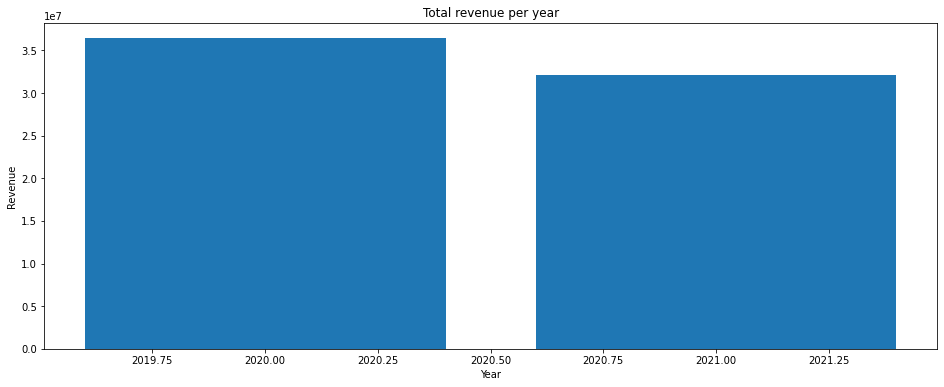

In [13]:
labels = list(revenue_year.index)
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(labels, revenue_year['revenue'])
ax.set_title('Total revenue per year')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue')

Text(0, 0.5, 'Revenue')

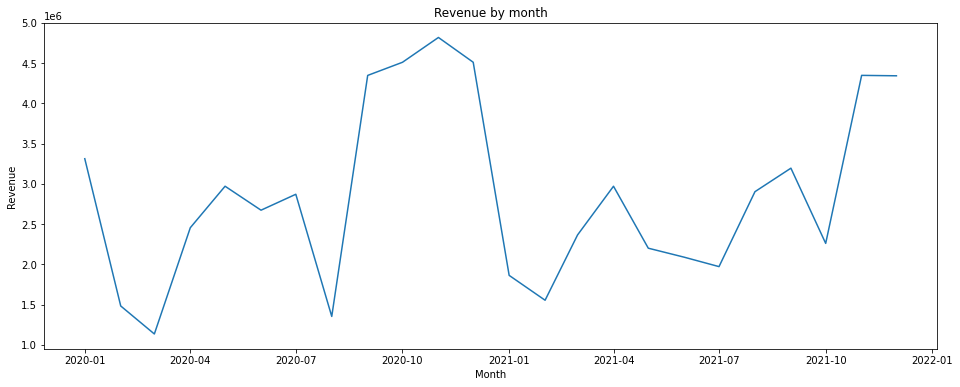

In [14]:
#show revenue trend over months
revenue_date = df.groupby('y-m').agg({'revenue_ext':'sum'})
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(revenue_date.index, revenue_date['revenue_ext'])
ax.set_title('Revenue by month')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')

Text(0, 0.5, 'num of orders')

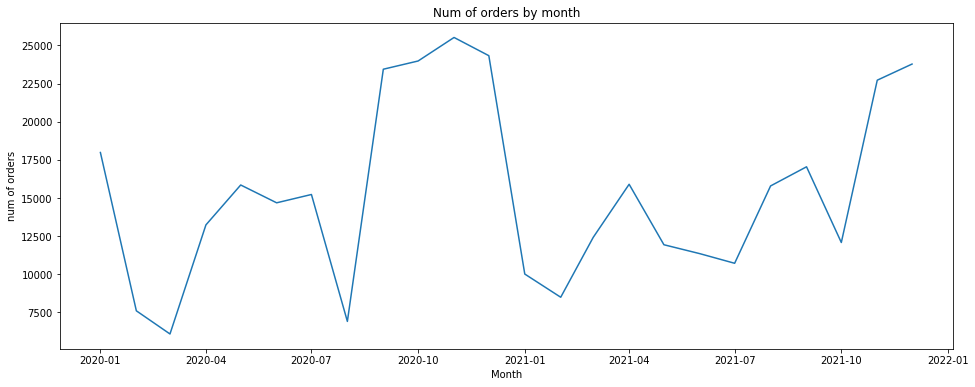

In [15]:
#show num of orders trend over months
revenue_date = df.groupby('y-m').agg({'Order ID':'count'})
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(revenue_date.index, revenue_date['Order ID'])
ax.set_title('Num of orders by month')
ax.set_xlabel('Month')
ax.set_ylabel('num of orders')

In [16]:
print('Products with highest qty ordered, revenue made, num of orders for each month:')
monthly_best = pd.DataFrame()
most_qty = df.groupby(['y-m','Product'])['Quantity Ordered'].sum().unstack('Product',fill_value=0).groupby('y-m').max().idxmax(1)
monthly_best['y-m'] = most_qty.index
monthly_best['qty'] = most_qty.values
monthly_best['revenue'] = df.groupby(['y-m','Product'])['revenue_ext'].sum().unstack('Product',fill_value=0).groupby('y-m').max().idxmax(1).values
monthly_best['numorders'] = df.groupby(['y-m','Product'])['Order ID'].count().unstack('Product',fill_value=0).groupby('y-m').max().idxmax(1).values
monthly_best

Products with highest qty ordered, revenue made, num of orders for each month:


,y-m,qty,revenue,numorders
0,2020-01-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
1,2020-02-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
2,2020-03-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
3,2020-04-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
4,2020-05-01,AAA Batteries (4-pack),Macbook Pro Laptop,Lightning Charging Cable
5,2020-06-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
6,2020-07-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
7,2020-08-01,AAA Batteries (4-pack),Macbook Pro Laptop,Lightning Charging Cable
8,2020-09-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
9,2020-10-01,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable


Analysis on product level

In [17]:
#make aggregations on product level
prod_agg = df.groupby('Product').agg(
    numorders = ('Order ID','count'),
    quantity = ('Quantity Ordered','sum'),
    revenue = ('revenue_ext','sum')
)

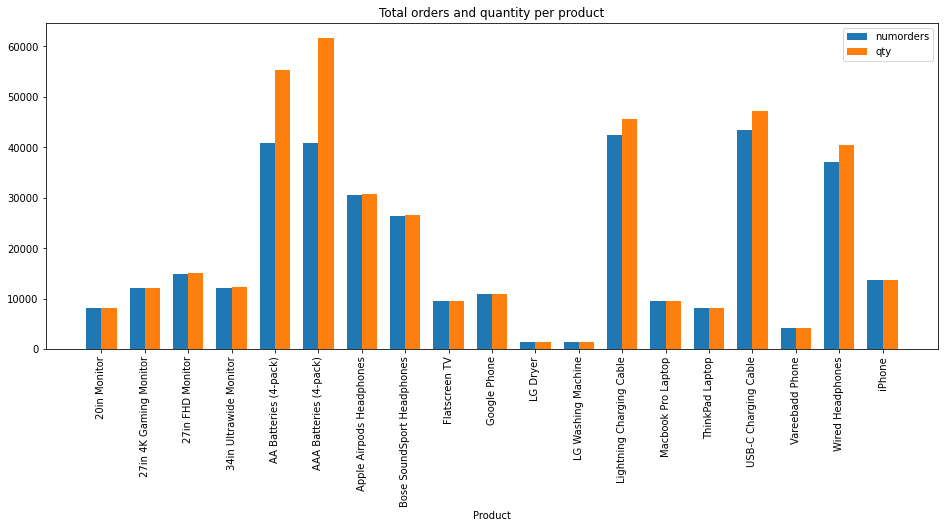

In [18]:
labels = list(prod_agg.index)
x = np.arange(len(labels))
w = 0.35
fig, ax = plt.subplots(figsize=(16, 6))
b1 = ax.bar(x - w/2, prod_agg['numorders'], w, label='numorders')
b2 = ax.bar(x + w/2, prod_agg['quantity'], w, label='qty')
ax.set_title('Total orders and quantity per product')
ax.set_xlabel('Product')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

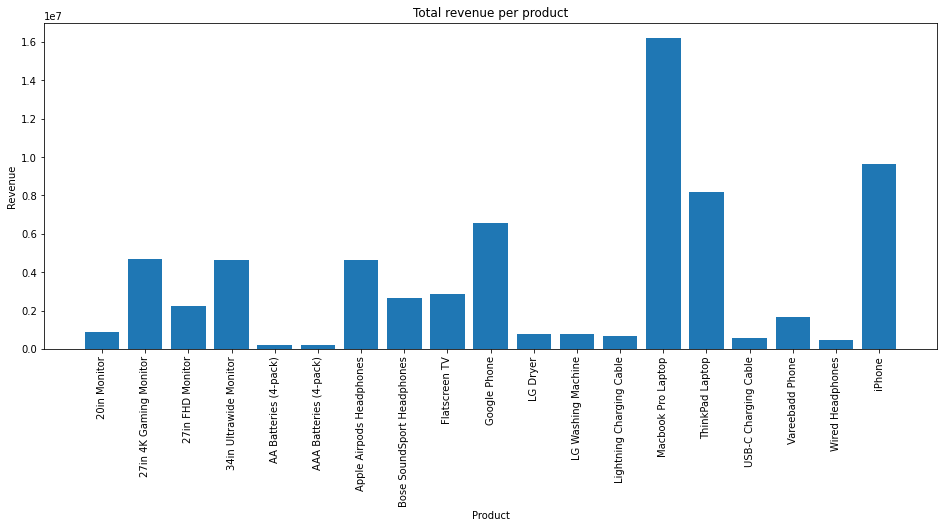

In [19]:
labels = list(prod_agg.index)
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(labels, prod_agg['revenue'])
ax.set_title('Total revenue per product')
ax.set_xlabel('Product')
ax.set_ylabel('Revenue')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

Analysis on order level

In [20]:
#make aggregations on order level
ord_agg = df.groupby('Order ID').agg(
    numprod = ('Product','count'),
    revenue = ('revenue_ext','sum')
)
ord_agg['Order ID'] = ord_agg.index
numprod_ord = ord_agg.groupby('numprod').agg(
    numord = ('Order ID','count')
)

In [21]:
print('The average revenue made from each order: {:.2f}'.format(ord_agg['revenue'].mean()))

The average revenue made from each order: 366.37


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

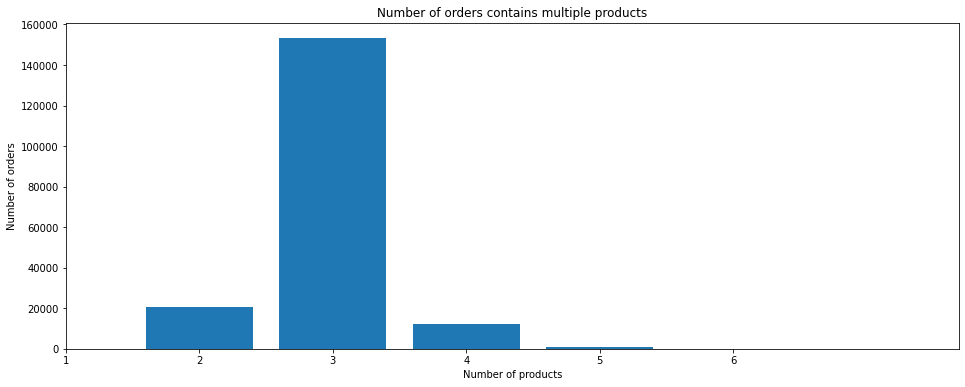

In [22]:
labels = list(numprod_ord.index)
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(labels, numprod_ord['numord'])
ax.set_title('Number of orders contains multiple products')
ax.set_xlabel('Number of products')
ax.set_ylabel('Number of orders')
ax.set_xticks(x)
ax.set_xticklabels(labels)

Analysis on state level

In [23]:
#Extract the state from address
df['state'] = df.apply(lambda row: row['Purchase Address'].split(',')[2].split(' ')[1], axis = 1)

In [24]:
#make aggregation on state level
state_agg = df.groupby('state').agg(
    numorders = ('Order ID','count'),
    quantity = ('Quantity Ordered','sum'),
    revenue = ('revenue_ext','sum')
)

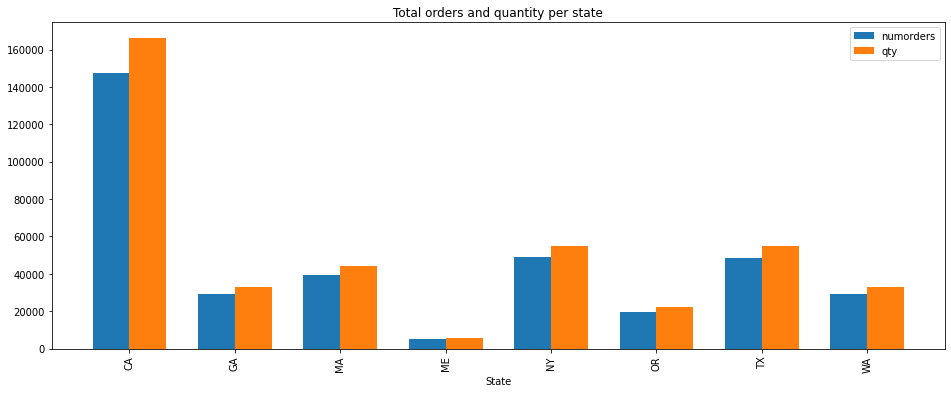

In [25]:
labels = list(state_agg.index)
x = np.arange(len(labels))
w = 0.35
fig, ax = plt.subplots(figsize=(16, 6))
b1 = ax.bar(x - w/2, state_agg['numorders'], w, label='numorders')
b2 = ax.bar(x + w/2, state_agg['quantity'], w, label='qty')
ax.set_title('Total orders and quantity per state')
ax.set_xlabel('State')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

[Text(0, 0, 'CA'),
 Text(1, 0, 'GA'),
 Text(2, 0, 'MA'),
 Text(3, 0, 'ME'),
 Text(4, 0, 'NY'),
 Text(5, 0, 'OR'),
 Text(6, 0, 'TX'),
 Text(7, 0, 'WA')]

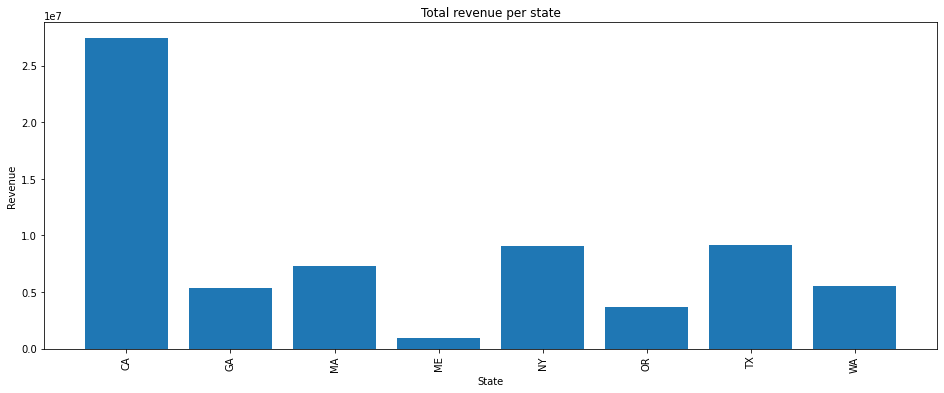

In [26]:
labels = list(state_agg.index)
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(labels, state_agg['revenue'])
ax.set_title('Total revenue per state')
ax.set_xlabel('State')
ax.set_ylabel('Revenue')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

In [27]:
print('Products with highest qty ordered, revenue made, num of orders for each state:')
state_popular = pd.DataFrame()
most_qty_state = df.groupby(['state','Product'])['Quantity Ordered'].sum().unstack('Product',fill_value=0).groupby('state').max().idxmax(1)
state_popular['state'] = most_qty_state.index
state_popular['qty'] = most_qty_state.values
state_popular['revenue'] = df.groupby(['state','Product'])['revenue_ext'].sum().unstack('Product',fill_value=0).groupby('state').max().idxmax(1).values
state_popular['numorders'] = df.groupby(['state','Product'])['Order ID'].count().unstack('Product',fill_value=0).groupby('state').max().idxmax(1).values
state_popular

Products with highest qty ordered, revenue made, num of orders for each state:


,state,qty,revenue,numorders
0,CA,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
1,GA,AAA Batteries (4-pack),Macbook Pro Laptop,Lightning Charging Cable
2,MA,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
3,ME,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
4,NY,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
5,OR,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
6,TX,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable
7,WA,AAA Batteries (4-pack),Macbook Pro Laptop,USB-C Charging Cable


Forecasting the total revenue of 2021/12

In [28]:
#aggregating revenue by month and transforming data for prophet model
revenue_data = df.groupby('y-m').agg(revenue = ('revenue_ext', 'sum'))
revenue_data['y-m'] = revenue_data.index
revenue_data['y-m']= pd.to_datetime(revenue_data['y-m'])
revenue_data = revenue_data.reset_index(drop = True)
y_test = revenue_data.iloc[23]['revenue']
revenue_data = revenue_data.iloc[:23]
revenue_data.columns = ['y','ds']

In [29]:
#defining and fitting prohet model, and make prediction
model = Prophet(changepoint_prior_scale = 0.001,seasonality_prior_scale = 0.01)
model.add_seasonality(name='quarterly',period = 3,fourier_order= 6 )
model.add_seasonality(name='halfyearly',period = 6,fourier_order= 5 )
model.add_seasonality(name='yearly',period = 12,fourier_order= 4 )
model.fit(revenue_data)
forecast = model.predict(pd.DataFrame({'ds':['2022-01-01']}))
pred = forecast['yhat'].values[0]
print('AE: ',np.abs(pred - y_test) )
print('APE: ',(np.abs(pred- y_test))/y_test)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


AE:  1148643.395370576
APE:  0.2644799410561769
